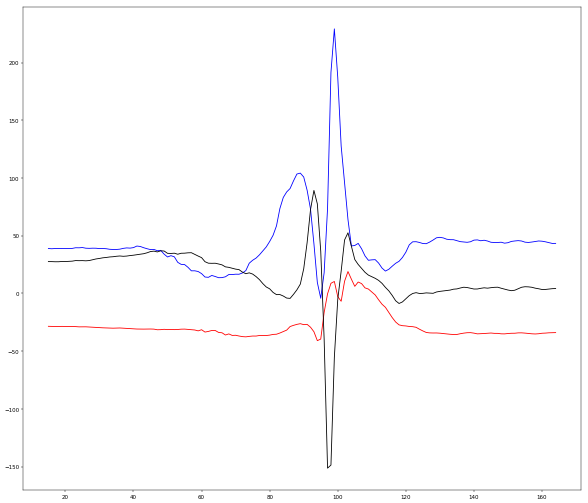

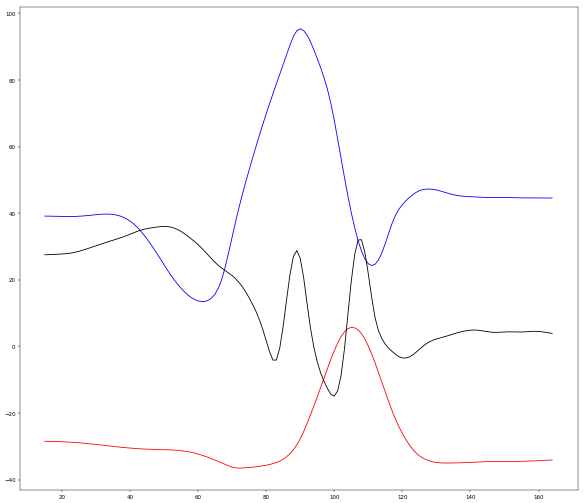

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

col_names = ['timestamp', 'X', 'Y', 'Z']
acc_data_reference = pd.read_csv('./reference-fd-bw/acc.csv', names=col_names)
# print(datetime.fromtimestamp((acc_data_forward['timestamp'][0]/1000.)))

TMP_START = 15
TMP_END = 165


xaxis = list(range(len(acc_data_reference)))[TMP_START:TMP_END]
x_reference = acc_data_reference['X']
# x_alt = savgol_filter(list(x_reference), 31, 2)
y_reference = acc_data_reference['Y']
z_reference = acc_data_reference['Z']
fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_reference[TMP_START:TMP_END]), color="blue", label="xaxis")
plt.plot(xaxis, np.rad2deg(y_reference[TMP_START:TMP_END]), color="red", label="yaxis")
plt.plot(xaxis, np.rad2deg(z_reference[TMP_START:TMP_END]), color="black", label="zaxis")
plt.show()

# reference data filtration
x_reference = savgol_filter(list(x_reference), 21, 2)
x_reference = savgol_filter(list(x_reference), 31, 2)
x_reference = x_reference[20:170]
y_reference = savgol_filter(list(y_reference), 21, 2)
y_reference = savgol_filter(list(y_reference), 31, 2)
z_reference = savgol_filter(list(z_reference), 11, 2)
z_reference = savgol_filter(list(z_reference), 21, 2)


fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_reference), color="blue", label="xaxis")
plt.plot(xaxis, np.rad2deg(y_reference[TMP_START:TMP_END]), color="red", label="yaxis")
plt.plot(xaxis, np.rad2deg(z_reference[TMP_START:TMP_END]), color="black", label="zaxis")
plt.show()
plt.legend()



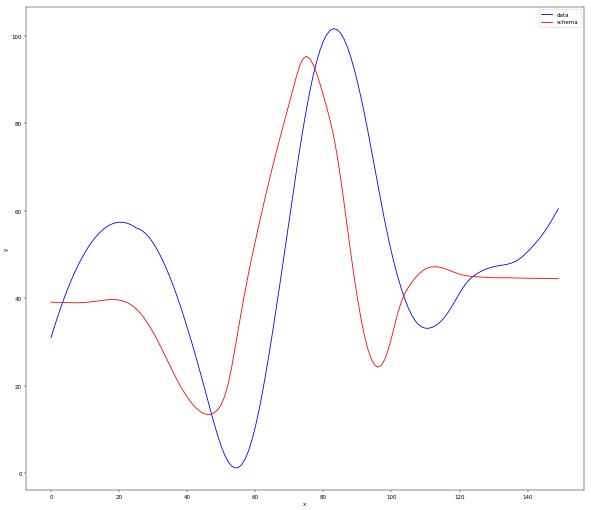

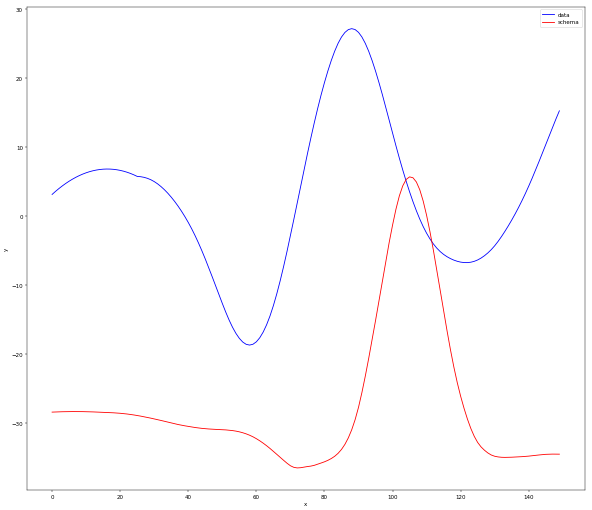

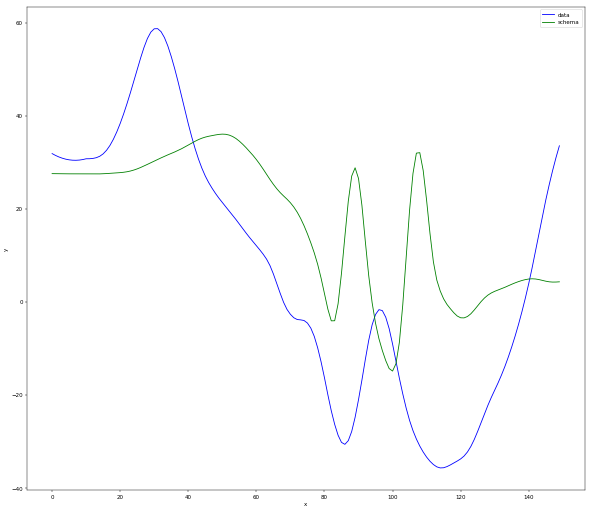

[ 0.68279997  0.68243339  0.68200007  0.6816002   0.6811388   0.68066871
  0.68044196  0.68047399  0.68064861  0.68107651  0.68190651  0.68307972
  0.68453927  0.68630379  0.68824523  0.69014366  0.69174463  0.69283329
  0.69331359  0.69291274  0.69133989  0.68836299  0.68367313  0.67703552
  0.66805838  0.65669425  0.64285679  0.62632344  0.60718106  0.5860109
  0.56296861  0.53811459  0.51175987  0.48437952  0.45623036  0.42793026
  0.400116    0.37335458  0.34838238  0.3254678   0.30457287  0.28569637
  0.26928047  0.25577924  0.24527238  0.23808665  0.23458304  0.23556895
  0.24166881  0.25391643  0.27452481  0.30686503  0.35375724  0.41777606
  0.49383002  0.57384956  0.65189286  0.72617647  0.79618785  0.86213561
  0.92520616  0.9865819   1.04683679  1.10579134  1.16306636  1.21870672
  1.27263868  1.32488616  1.37546263  1.42516456  1.47577266  1.52781041
  1.5790719   1.62436558  1.65410551  1.66390208  1.65522728  1.63192324
  1.59701461  1.55469826  1.50875196  1.46026756  1.

In [5]:

TMP_START = 0
TMP_END = 150

acc_data_forward = pd.read_csv('./amg-forward/acc.csv', names=col_names)
xaxis = list(range(len(acc_data_forward)))[TMP_START:TMP_END]

x_normal = acc_data_forward['X']
y_normal = acc_data_forward['Y']
z_normal = acc_data_forward['Z']


# forward data normalization
x_normal = savgol_filter(list(x_normal), 21, 2)
x_normal = savgol_filter(list(x_normal), 51, 2)
y_normal = savgol_filter(list(y_normal), 31, 2)
y_normal = savgol_filter(list(y_normal), 51, 2)
z_normal = savgol_filter(list(z_normal), 11, 2)
z_normal = savgol_filter(list(z_normal), 21, 2)


fig = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(x_normal[TMP_START:TMP_END]), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(x_reference[TMP_START:TMP_END]), color="red", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig2 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(y_normal[TMP_START:TMP_END]), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(y_reference[TMP_START:TMP_END]), color="red", label="schema")
# plt.plot(xaxis, np.rad2deg(z_normal), color="black", label="zaxis")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
fig3 = plt.figure(figsize=(18, 16), dpi=40, facecolor='w', edgecolor='k')
plt.plot(xaxis, np.rad2deg(z_normal[TMP_START:TMP_END]), color="blue", label="data")
plt.plot(xaxis, np.rad2deg(z_reference[TMP_START:TMP_END]), color="green", label="schema")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Populating the interactive namespace from numpy and matplotlib
24.31579338 0.408795738966


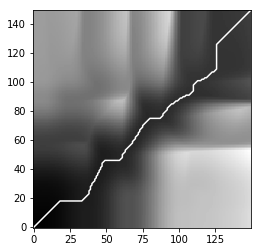

In [4]:
%pylab inline
from dtw import dtw

# DTW for X acc
k = x_normal[TMP_START:TMP_END]
n = x_reference[TMP_START:TMP_END]
dist, cost, acc, path = dtw(k, n, dist=lambda k, n: norm(k - n))
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
print(mean(acc), mean(cost))


50.2810950537 0.535682450749


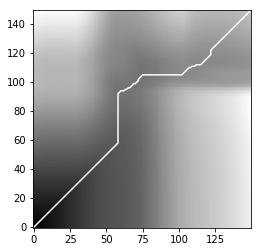

In [5]:
# DTW for Y acc
k = y_normal[TMP_START:TMP_END]
n = y_reference[TMP_START:TMP_END]
dist, cost, acc, path = dtw(k, n, dist=lambda k, n: norm(k - n))
print(mean(acc), mean(cost))
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')

24.3007110991 0.481658058521


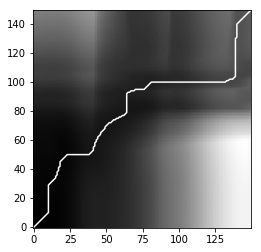

In [6]:
# DTW for Z acc
k = z_normal[TMP_START:TMP_END]
n = z_reference[TMP_START:TMP_END]
dist, cost, acc, path = dtw(k, n, dist=lambda k, n: norm(k - n))
imshow(acc.T, origin='lower', cmap=cm.gray, interpolation='nearest')
plot(path[0], path[1], 'w')
# print(cost)
print(mean(acc), mean(cost))